#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import re

#### Reading the CSV file

In [29]:
df = pd.read_csv('Tweets.csv')
df.head()

,airline_sentiment,text
0,neutral,@USAirways Is there a phone line to call into ...
1,positive,@united Bag was finally delivered and intact. ...
2,positive,@usairways Thanks to Kevin and team at F38ish ...
3,negative,"@AmericanAir Yes, talked to them. FLL says is ..."
4,negative,@VirginAmerica and it's a really big bad thing...


#### Sorting the values based on the `airline_sentiment`

In [3]:
df.sort_values('airline_sentiment', inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,airline_sentiment,text
0,negative,@USAirways The fact we did not get notified hi...
1,negative,@united I'd thank you - but you didn't help. ...
2,negative,@USAirways / @AmericanAir don't forget without...
3,negative,@USAirways seriously!!! Flight Cancelled Flig...
4,negative,"@united Why tell us flight is delayed, then te..."


#### Observing the unique type of classes

In [4]:
classes = list(df['airline_sentiment'].unique())
classes

['negative', 'neutral', 'positive']

#### Creating a list of stop_words

In [5]:
stop_words = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they',
'them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was',
'were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because',
'as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above',
'below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when',
'where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same',
'so','than','too','very','s','t','can','will','just','don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y',
'ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",
'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",
'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

 ### Bag Of Words Implementation

In [6]:
from emoji import UNICODE_EMOJI

def is_emoji(sentence):
    emoji_list = [c for c in sentence if c in UNICODE_EMOJI]
    return emoji_list


In [7]:
def bagOfWords(temp_df):
    vocabulary = set()
    for i in range(len(temp_df)):
        text_words = []
        emoji_list = is_emoji(temp_df.iloc[i]['text'])
        words = (re.sub('[^@#A-Za-z\s]+',' ', temp_df.iloc[i]['text'])).lower().split()
        for w in words:
            if '@' in w or '#' in w or len(w) < 4 or len(w) > 15:
                continue
            elif w in stop_words:
                continue
            else:
                vocabulary.add(w)
                text_words.append(w)
        text_words += emoji_list
        [vocabulary.add(c) for c in emoji_list]
        temp_df.iloc[i]['text'] = text_words
        
    return temp_df, vocabulary

In [8]:
df, vocab = bagOfWords(df)
print(len(vocab))
df

9927


,airline_sentiment,text
0,negative,"[fact, notified, hindered, ability, look, alte..."
1,negative,"[thank, help, taking, hours, reply, message, m..."
2,negative,"[forget, without, customers, would, business]"
3,negative,"[seriously, flight, cancelled, flighted, auto,..."
4,negative,"[tell, flight, delayed, tell, time, spare, del..."
...,...,...
14635,positive,"[thank, 😊]"
14636,positive,"[talked, reservation, must, congratulation, fr..."
14637,positive,"[thanks, response, able, situation, resolved, ..."
14638,positive,"[thanks, team, dealing, flight, houston]"


### Stratified Data Splitting Function
#### Creating a data splitting function which splits in 80 - 20 train-test split

In [9]:
def dataSplit(df):
    train_dfs = []
    test_dfs = []
    index_loc = 0
    class_splits = []
    index = []
    for c in classes:
        tweets = len(df[df['airline_sentiment'] == c])
        class_splits.append(tweets)
        test_tweets = int(0.2*tweets)
        train_tweets = tweets - test_tweets
        train_dfs.append(df.iloc[np.arange(index_loc, index_loc + train_tweets)])
        index_loc += train_tweets
        index.append(index_loc)
        test_dfs.append(df.iloc[np.arange(index_loc, index_loc + test_tweets)])
        index_loc += test_tweets
        index.append(index_loc)

    train_df = pd.concat(train_dfs)
    test_df = pd.concat(test_dfs)

    print('Training Data (80% of data): ',len(train_df))
    print('Testing Data (20% of data): ',len(test_df))

    
    return train_df, test_df, index

In [10]:
train_df, test_df, indices = dataSplit(df)
print('The splits are: ',indices)

Training Data (80% of data):  11714
Testing Data (20% of data):  2926
The splits are:  [7343, 9178, 11658, 12277, 14168, 14640]


#### Test & Training Data Splits

In [11]:
print('Negative (Training): ', indices[0] - 0)
display(train_df.loc[0:indices[0]])
print('Negative (Testing): ', indices[1] - indices[0])
display(test_df.loc[indices[0]:indices[1]])

Negative (Training):  7343


,airline_sentiment,text
0,negative,"[fact, notified, hindered, ability, look, alte..."
1,negative,"[thank, help, taking, hours, reply, message, m..."
2,negative,"[forget, without, customers, would, business]"
3,negative,"[seriously, flight, cancelled, flighted, auto,..."
4,negative,"[tell, flight, delayed, tell, time, spare, del..."
...,...,...
7338,negative,"[enough, already, poor, service, planes, ridic..."
7339,negative,"[options, tonight, look, like, make, time, res..."
7340,negative,"[hard, catering, ready]"
7341,negative,"[tried, already, tried, forgetting, wifi, netw..."


Negative (Testing):  1835


,airline_sentiment,text
7343,negative,"[first, fares, three, times, carriers, seats, ..."
7344,negative,"[disappointment, arrived, kept, without, options]"
7345,negative,"[airport, self, checkin, option, employee, tra..."
7346,negative,"[wifi, lounge, reminds, days, dial]"
7347,negative,"[assistance, helpful, frustrating, disappointi..."
...,...,...
9173,negative,"[find, unfortunately, helpful, took, info, inc..."
9174,negative,"[contacted, yesterday, told, nothing, suggeste..."
9175,negative,"[tried, running, curb, side, self, check, wast..."
9176,negative,"[said, could, move, thursday, flight, free, ca..."


In [12]:
print('Neutral (Training): ', indices[2] - indices[1])
display(train_df.loc[indices[1]:indices[2]])
print('Neutral (Testing): ', indices[3] - indices[2])
display(test_df.loc[indices[2]:indices[3]])

Neutral (Training):  2480


,airline_sentiment,text
9178,neutral,"[says, incentive, offer, impact, share, count,..."
9179,neutral,[past]
9180,neutral,"[flight, morning, flying, toddler, plane, heat..."
9181,neutral,"[assume, benefits, apply, reservation, partner..."
9182,neutral,"[email, thought, supposed, reply, 😂]"
...,...,...
11653,neutral,"[need, complain, twitter, refund, auto, applied]"
11654,neutral,"[updated, power, outlets, seat, back, flying, ..."
11655,neutral,"[captain, takes, muscles, frown, smile, ready,..."
11656,neutral,"[take, midway, chicago, march, april, make, oh..."


Neutral (Testing):  619


,airline_sentiment,text
11658,neutral,"[instead, bourbon, street]"
11659,neutral,"[return, thanks]"
11660,neutral,[entertaining]
11661,neutral,"[adds, pillows, instead, flat, seats, first, c..."
11662,neutral,"[quick, question, bought, wifi, phone, tablet,..."
...,...,...
12272,neutral,"[easily, atlanta, show, need, tickets, help]"
12273,neutral,"[airport, first, thing, morning]"
12274,neutral,"[known, traveler, number, existing, reservatio..."
12275,neutral,"[flights, flat, seating, around, date, march]"


In [13]:
print('Positive (Training): ', indices[4] - indices[3])
display(train_df.loc[indices[3]:indices[4]])
print('Positive (Testing): ', indices[5] - indices[4])
display(test_df.loc[indices[4]:indices[5]])

Positive (Training):  1891


,airline_sentiment,text
12277,positive,"[love, dancing, little, richard, cool, beans]"
12278,positive,"[shavon, customer, service, desk, charlotte, f..."
12279,positive,"[please, companion, pass]"
12280,positive,"[thanks, next, slog, city, goes]"
12281,positive,"[spoke, representative, moved, flight, earlier..."
...,...,...
14163,positive,"[thanks, quick, reply]"
14164,positive,[thanks]
14165,positive,"[grandbabies, weeks, travel, births, thank, re..."
14166,positive,"[definitely, trip, remember, second, season, f..."


Positive (Testing):  472


,airline_sentiment,text
14168,positive,"[good, going, make, boston, time, actually, wi..."
14169,positive,"[ready, disneyworld, http, stqy]"
14170,positive,"[love, jetblue, speedy, twitter, customer, ser..."
14171,positive,[thank]
14172,positive,[thanks]
...,...,...
14635,positive,"[thank, 😊]"
14636,positive,"[talked, reservation, must, congratulation, fr..."
14637,positive,"[thanks, response, able, situation, resolved, ..."
14638,positive,"[thanks, team, dealing, flight, houston]"


#### Shuffling the dataframes so all classes are not next to each other

In [15]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df  = test_df.sample(frac=1).reset_index(drop=True)
# train_df = shuffle(train_df)
# test_df = shuffle(test_df)
# train_df = train_df.reset_index(drop=True)
train_df

,airline_sentiment,text
0,neutral,"[think, boarding, chill, untz, untz, untz, lik..."
1,negative,"[ever, complete, ever, customer, service]"
2,negative,"[flight, delayed, times, spent, almost, tarmac..."
3,negative,"[experienced, defines, customer, service, flig..."
4,negative,"[unfriendly, screw, family, hates, kids, moms,..."
...,...,...
11709,neutral,"[talks, military, baggage, fees, please, guide..."
11710,negative,"[compensate, clothes]"
11711,negative,"[united, doesnt, give, shits, customers]"
11712,positive,"[nice, prioritize, internet, traffic, streamin..."


### Data Preprocessing Function

In [16]:
def dataPreprocessing(t_df, vocab):
    BOW = pd.DataFrame(columns=list(vocab), index = np.arange(len(t_df))).fillna(0)
    for i in range(len(t_df)):
        for w in t_df.iloc[i]['text']:
            BOW.iloc[i][w] += 1

    arr = np.empty((0,3), int)
    for i in range(BOW.shape[0]):
        if t_df.iloc[i]['airline_sentiment'] == 'negative':
            arr = np.append(arr, np.array([[1,0,0]]), axis=0)
        elif t_df.iloc[i]['airline_sentiment'] == 'neutral':
            arr = np.append(arr, np.array([[0,1,0]]), axis=0)
        else:
            arr = np.append(arr, np.array([[0,0,1]]), axis=0)
         
    return BOW, arr

In [17]:
train_copy = train_df.copy()
Bow_df, Y_Train = dataPreprocessing(train_copy, vocab)
Bow_df.head()

,salisbury,dread,swell,physically,awhile,ideologias,helped,othr,integrity,sport,...,standbye,announced,woman,lqjt,vmquurzupw,peter,wajk,swivel,shirt,reflect
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Converting the data frame to numpy arrays

In [18]:
X_Train = Bow_df[Bow_df.columns[:]].to_numpy()

print(X_Train.shape)
print(Y_Train.shape)

(11714, 9927)
(11714, 3)


#### Softmax and Cross Entropy Loss Functions

In [19]:
def softmax(X):
    X_exp = np.exp(X)
    X_exp_sum = X_exp.sum(axis=1, keepdims=True)
    return X_exp / X_exp_sum

def cross_entropy_loss(y_pred, y_true):
        return (-(y_true * np.log(y_pred))).sum()/float(len(y_true))

### Mini Batch Gradient Descent Implementation with Batch-Size 32

In [20]:
def gradientDescent(X, Y, alpha, n_epoch, batch_size):
    J = list()
    
    num_outputs = 3
    num_inputs = X.shape[1]
    
    W = np.random.normal(0, 0.01, (X.shape[1], num_outputs))
    
    batches = np.arange(0,X.shape[0], batch_size)
    if X.shape[0] % batch_size != 0:
        batches = batches[:-1]
    
    for epoch in range(n_epoch):
#         np.random.shuffle(batches)
        for batch in batches:
            Z = np.dot(X[batch:batch+batch_size], W) # (11714, 8771) x (8771,3)  = (11714, 3)
            Y_hat = softmax(Z)
            L = Y_hat - Y[batch:batch+batch_size]
            W = W - ( alpha * np.dot(np.transpose(X[batch:batch+batch_size]),L) )
        J.append(cross_entropy_loss(Y_hat, Y[batch:batch+batch_size]))
    
    return W, J
        
        

In [21]:
W, J = gradientDescent(X_Train, Y_Train, 0.001, 150, 32)
W

array([[-0.01922534,  0.00052987,  0.00157108],
       [-0.02408424,  0.0338702 , -0.03847438],
       [-0.05541329,  0.06746999, -0.01427279],
       ...,
       [-0.05630639, -0.01857594,  0.07819786],
       [ 0.0412298 ,  0.01054772, -0.05154087],
       [-0.02535392,  0.09408868, -0.08693205]])

#### Cost Function Graph

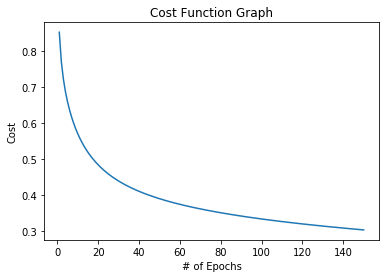

0.302449511958648

In [22]:
import matplotlib.pyplot as plt 
def plot_graph(J):
    x = np.arange(1,151) 
    y = J 

    plt.plot(x, y) 

    plt.xlabel('# of Epochs')  
    plt.ylabel('Cost') 

    plt.title('Cost Function Graph') 

    plt.show()
    
plot_graph(J)
J[-1]

#### Predict function

In [23]:
def predict(X, W):
    Y_pred = np.dot(X,W)
    Y_pred = softmax(Y_pred)
    return Y_pred

#### Preprocessing the test data

In [24]:
Bow_test, Y_Test = dataPreprocessing(test_df, vocab)
Bow_test.head()

,salisbury,dread,swell,physically,awhile,ideologias,helped,othr,integrity,sport,...,standbye,announced,woman,lqjt,vmquurzupw,peter,wajk,swivel,shirt,reflect
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_Test = Bow_test[Bow_test.columns[:]].to_numpy()
print(X_Test.shape)
print(Y_Test.shape)

(2926, 9927)
(2926, 3)


#### Creating a Confusion Matrix on the basis of the predicted result

In [26]:
def confusionMatrix(X_Test, Y_Test, W):
    Y_Pred = predict(X_Test, W)
    Y_A = pd.Series(Y_Test.argmax(axis=1), name='Actual')
    Y_P = pd.Series(Y_Pred.argmax(axis=1), name='Predicted')
    df_confusion = pd.crosstab(Y_P, Y_A, margins=True)
    display(df_confusion)
    return df_confusion
df_conf = confusionMatrix(X_Test, Y_Test, W)

Actual,0,1,2,All
Predicted,,,,
0,1659,265,116,2040
1,115,292,44,451
2,61,62,312,435
All,1835,619,472,2926


#### Key
0 : Negative  
1 : Neutral  
2 : Positive  

### Evaluation Report

In [32]:
def evaluationReport(df_conf):
    print('EVALUATION REPORT \n')
    print('-----------------')
    df_c = df_conf.iloc[:-1,:-1]
    TP, FP, FN, TN, P, R, F, A = [], [], [], [], [], [], [], []
    for i, c in enumerate(classes):
        TP.append(df_c.iloc[i][i])
        FP.append(sum(df_c.iloc[i,:]) - TP[-1])
        FN.append(sum(df_c.iloc[:,i]) - TP[-1])
        TN.append(df_conf.iloc[3,3] - TP[-1] - FP[-1] - FN[-1])
        A.append((TP[-1]+TN[-1])/(df_conf.iloc[3,3]))
        P.append( (TP[-1])/(TP[-1] + FP[-1]) )
        R.append( (TP[-1])/(TP[-1] + FN[-1]) )
        F.append( (2*P[-1]*R[-1])/(P[-1]+R[-1]) )
        print('With Respect To: ', c.capitalize())
        print('\n')
        print('    True Positives : ', TP[-1])
        print('    True Negatives : ', TN[-1])
        print('    False Positives: ', FP[-1])
        print('    False Negatives: ', FN[-1])
        print('    Accuracy       : ', (A[-1]))
        print('    Precision      : ', (P[-1]))
        print('    Recall         : ', (R[-1]))
        print('    F1-Score       : ', (F[-1]))
        print('\n')
    print('-----------------')
    print('Macro Average (Accuracy) : ', sum(A)/float(3))
    print('Macro Average (Precision): ', sum(P)/float(3))
    print('Macro Average (Recall)   : ', sum(R)/float(3))
    print('Macro Average (F1-Score) : ', (sum(F))/float(3))
    print('\n')
    p = (sum(TP))/(sum(TP)+sum(FP))
    r = (sum(TP))/(sum(TP)+sum(FN))
    print('Micro Average (Accuracy) : ', (sum(TP) + sum(TN))/( sum(TP)+ sum(FN) + sum(FP) + sum(TN)))
    print('Micro Average (Precision): ', (sum(TP))/(sum(TP)+sum(FP)))
    print('Micro Average (Recall)   : ', (sum(TP))/(sum(TP)+sum(FN)))
    print('Micro Average (F1-Score) : ', (2*p*r)/(p+r))
    
evaluationReport(df_conf)

EVALUATION REPORT 

-----------------
With Respect To:  Negative


    True Positives :  1659
    True Negatives :  710
    False Positives:  381
    False Negatives:  176
    Accuracy       :  0.8096377306903623
    Precision      :  0.8132352941176471
    Recall         :  0.9040871934604905
    F1-Score       :  0.856258064516129


With Respect To:  Neutral


    True Positives :  292
    True Negatives :  2148
    False Positives:  159
    False Negatives:  327
    Accuracy       :  0.833902939166097
    Precision      :  0.647450110864745
    Recall         :  0.4717285945072698
    F1-Score       :  0.5457943925233645


With Respect To:  Positive


    True Positives :  312
    True Negatives :  2331
    False Positives:  123
    False Negatives:  160
    Accuracy       :  0.903280929596719
    Precision      :  0.7172413793103448
    Recall         :  0.6610169491525424
    F1-Score       :  0.6879823594266814


-----------------
Macro Average (Accuracy) :  0.8489405331510594
Ma